# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

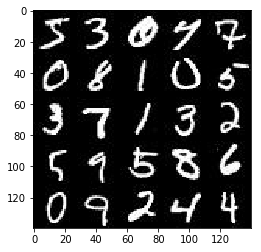

In [11]:
import helper
data_dir = './data'

show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

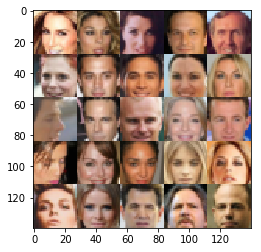

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [1]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0


C:\Users\evillarraga\AppData\Local\Continuum\Anaconda3\envs\tfdl\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [2]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, 
                                shape=(None, image_width, image_height, image_channels ), 
                                name='input_real')
    
    input_z = tf.placeholder(tf.float32, 
                             shape=(None, z_dim ), 
                             name='input_z')
    
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')
    

    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [3]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    def LReLU(input, alphaD):
        return tf.maximum(alphaD*input, input)
        
        
        
    with tf.variable_scope('discriminator', reuse=reuse):
        
        #alphaD=0.2
        
        #input layer is 28x28x1 in MNIST or 28x28x3 in celebA - discriminator layer 1
        dis_layer1 = tf.layers.conv2d(images, 128, 5, strides=2, padding='same',
                                     kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False, seed = None,
                                                                                            dtype=tf.float32))
        dis_layer1 = tf.layers.batch_normalization(dis_layer1, training=True)
        relu1 =  LReLU(dis_layer1, 0.2)                                       #tf.maximum(alphaD*normalization1, normalization1)
        
        
        #input layer is 14x14x128 in MNIST or 14x14x128 in celebA  - discriminator layer 2
        dis_layer2 = tf.layers.conv2d(relu1, 256, 5, strides=2, padding='same',
                                     kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False, seed = None,
                                                                                            dtype=tf.float32))
        dis_layer2 = tf.layers.batch_normalization(dis_layer2, training=True)
        relu2 =  LReLU(dis_layer2, 0.2) # tf.maximum(alphaD*normalization2, normalization2)        
       
    
        #input layer is 7x7x256 in MNIST or 7x7x256 in celebA  - discriminator layer 3
        dis_layer3 = tf.layers.conv2d(relu2, 512, 5, strides=1, padding='same',
                                     kernel_initializer=tf.contrib.layers.xavier_initializer(uniform=False, seed = None,
                                                                                            dtype=tf.float32))  #stride=1 doesnt change width and height
        dis_layer3=tf.layers.batch_normalization(dis_layer3, training=True)
        relu3 =  LReLU(dis_layer3, 0.2) # tf.maximum(alphaD*normalization3, normalization3)
        
        #flatten layer
        #flat = tf.reshape(relu3, (-1,7*7*512))
        flat = tf.contrib.layers.flatten(relu3)
        flat = tf.nn.dropout(flat, keep_prob=0.5)
        
        # convert the flat tensor to a logit
        logits = tf.layers.dense(flat,1)  
        
        #produce output with act function sigmoid
        out = tf.sigmoid(logits)
        

        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [4]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    #alphaG = 0.2
    
    def LReLU(input, alphaG):
        return tf.maximum(alphaG*input, input)
    
    with tf.variable_scope('generator', reuse = not is_train):
        #first fully conected layer
        gen_layer1 = tf.layers.dense(z, 14*14*512)
        #reshape
        gen_layer1 = tf.reshape(gen_layer1,(-1,14,14,512))
        #bacth normalization
        gen_layer1 = tf.layers.batch_normalization(gen_layer1, training =  is_train)
        #Leak ReLu
        gen_layer1 = LReLU(gen_layer1, 0.2)  #tf.maximum(alphaG*gen_layer1, gen_layer1)
        # now there is a 14 x 14 x 512 normalized and leak Relu activated tensor
        
       
        #second generation layer - reduce the deep from 512 to 256
        gen_layer2 = tf.layers.conv2d_transpose(gen_layer1, 256, 5, strides=2, padding='same')  #up sampling width an height
        gen_layer2 = tf.layers.batch_normalization(gen_layer2, training = is_train) 
        gen_layer2 = LReLU(gen_layer2, 0.2)  
        # 14 x 14 x 256
  
        #third generation layer - reduce the deep from 256 to 128
        gen_layer3 = tf.layers.conv2d_transpose(gen_layer2, 128, 5, strides=1, padding='same')  #up sampling width an height
        gen_layer3 = tf.layers.batch_normalization(gen_layer3, training = is_train) 
        gen_layer3 = LReLU(gen_layer3, 0.2)  
        # 28 x 28 x 128

        #fourth generation layer - reduce the deep from 128 to 64
        gen_layer4 = tf.layers.conv2d_transpose(gen_layer3, 64, 5, strides=1, padding='same')  #up sampling width an height
        gen_layer4 = tf.layers.batch_normalization(gen_layer4, training = is_train) 
        gen_layer4 = LReLU(gen_layer4, 0.2)
        # 28 x 28 x 64
        
        
        #output generation layer
        logits = tf.layers.conv2d(gen_layer4, out_channel_dim, 5, strides=1, padding='same')  #same width and height
        
        out = tf.tanh(logits)/tf.constant(2.0)
        
        
        
    
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [5]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    alpha = 0.1
    
    #Generator model
    g_model = generator(input_z, out_channel_dim)
    #Discriminator model for real data
    d_model_real, d_logits_real = discriminator(input_real)
    #Discriminator model for fake data
    d_model_fake, d_logits_fake = discriminator(g_model, reuse = True)
    
    d_loss_real = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    
    d_loss_fake = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(
                      tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [6]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
  
    #get weights and bias to update - variables
    trainable_variables = tf.trainable_variables()
    d_vars = [var for var in trainable_variables if var.name.startswith('discriminator')]
    g_vars = [var for var in trainable_variables if var.name.startswith('generator')]
    
    #optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1 = beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [7]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [38]:
import os

list = os.listdir(r'C:\PERSONAL\UDACITY\NDegreeDL\semana 5\Project\face_generation\data\mnist') # dir is your directory path
len_mnist = number_files = len(list)
print (len_mnist)

60000


In [30]:
import os

list = os.listdir(r'C:\PERSONAL\UDACITY\NDegreeDL\semana 5\Project\face_generation\data\img_align_celeba') # dir is your directory path
len_faces = number_files = len(list)
print (len_faces)

202599


In [8]:
from time import gmtime, strftime

In [9]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    steps = 0
    _, image_width, image_height, image_channels = data_shape
    input_real, input_z, lr = model_inputs(image_width, image_height,image_channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z,image_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    
    is_train = tf.placeholder(tf.bool)
        
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images = batch_images * 2
                
                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                 # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate})
                #_ = sess.run(g_opt, feed_dict={input_z: batch_z, lr:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate,is_train:True})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, lr:learning_rate,is_train:False})
                
                if steps % 5 == 0:
                    # At the end of each epoch, get the losses and print them out
                    print("batch No.: ", steps, "time: ", strftime("%Y-%m-%d %H:%M:%S", gmtime()))
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

                if steps % 10== 0:
                    #Print the current image
                    show_generator_output(sess, 36, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

batch No.:  5 time:  2017-05-19 16:28:12
Epoch 1/2... Discriminator Loss: 3.1726... Generator Loss: 0.2698
batch No.:  10 time:  2017-05-19 16:30:34
Epoch 1/2... Discriminator Loss: 6.8989... Generator Loss: 0.0039


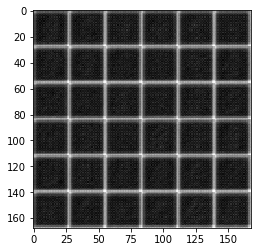

batch No.:  15 time:  2017-05-19 16:33:03
Epoch 1/2... Discriminator Loss: 7.2830... Generator Loss: 0.3208
batch No.:  20 time:  2017-05-19 16:35:32
Epoch 1/2... Discriminator Loss: 6.3000... Generator Loss: 0.0177


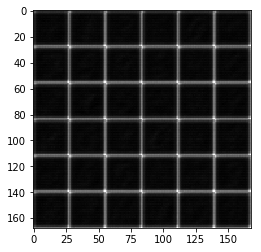

batch No.:  25 time:  2017-05-19 16:37:56
Epoch 1/2... Discriminator Loss: 4.8021... Generator Loss: 0.5554
batch No.:  30 time:  2017-05-19 16:40:23
Epoch 1/2... Discriminator Loss: 3.0166... Generator Loss: 0.3915


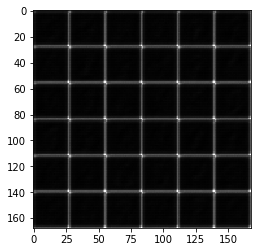

batch No.:  35 time:  2017-05-19 16:42:53
Epoch 1/2... Discriminator Loss: 3.9145... Generator Loss: 0.0286
batch No.:  40 time:  2017-05-19 16:45:17
Epoch 1/2... Discriminator Loss: 3.5761... Generator Loss: 0.4437


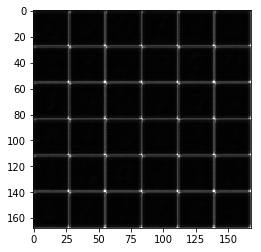

In [ ]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2


mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)
    

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

training data with dimension: 28 28 3 for real images
dimension of random variable is:  100
image mode is:  RGB
train->input_real.get_shape:  (?, 28, 28, 3)
train->input_z.get_shape:  (?, 100)
train-> actual learning rate:  0.0001
batch No.:  20
Epoch 1/1... Discriminator Loss: 1.2979... Generator Loss: 0.7574
batch No.:  40
Epoch 1/1... Discriminator Loss: 1.4507... Generator Loss: 0.6128
batch No.:  60
Epoch 1/1... Discriminator Loss: 1.2468... Generator Loss: 0.6135
batch No.:  80
Epoch 1/1... Discriminator Loss: 1.0190... Generator Loss: 1.0011
batch No.:  100
Epoch 1/1... Discriminator Loss: 1.0205... Generator Loss: 0.7700


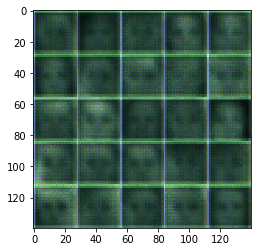

batch No.:  120
Epoch 1/1... Discriminator Loss: 0.7653... Generator Loss: 2.2764
batch No.:  140
Epoch 1/1... Discriminator Loss: 0.7408... Generator Loss: 2.6218
batch No.:  160
Epoch 1/1... Discriminator Loss: 0.6121... Generator Loss: 1.2111
batch No.:  180
Epoch 1/1... Discriminator Loss: 0.7534... Generator Loss: 1.4190
batch No.:  200
Epoch 1/1... Discriminator Loss: 0.7781... Generator Loss: 0.9805


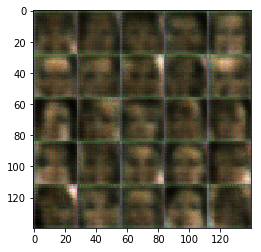

batch No.:  220
Epoch 1/1... Discriminator Loss: 0.3643... Generator Loss: 2.4757
batch No.:  240
Epoch 1/1... Discriminator Loss: 0.5568... Generator Loss: 1.8219
batch No.:  260
Epoch 1/1... Discriminator Loss: 0.9183... Generator Loss: 4.7238
batch No.:  280
Epoch 1/1... Discriminator Loss: 0.7086... Generator Loss: 2.2764
batch No.:  300
Epoch 1/1... Discriminator Loss: 0.3392... Generator Loss: 2.9713


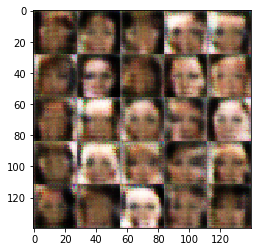

batch No.:  320
Epoch 1/1... Discriminator Loss: 0.4947... Generator Loss: 1.5765
batch No.:  340
Epoch 1/1... Discriminator Loss: 0.4037... Generator Loss: 2.2175
batch No.:  360
Epoch 1/1... Discriminator Loss: 0.2660... Generator Loss: 3.3854
batch No.:  380
Epoch 1/1... Discriminator Loss: 0.2828... Generator Loss: 2.8598
batch No.:  400
Epoch 1/1... Discriminator Loss: 0.2787... Generator Loss: 3.8299


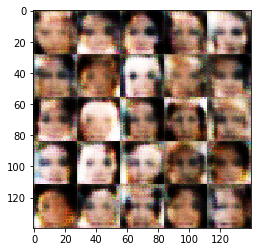

batch No.:  420
Epoch 1/1... Discriminator Loss: 0.2648... Generator Loss: 3.7695
batch No.:  440
Epoch 1/1... Discriminator Loss: 0.3906... Generator Loss: 2.0783
batch No.:  460
Epoch 1/1... Discriminator Loss: 0.6189... Generator Loss: 1.1885
batch No.:  480
Epoch 1/1... Discriminator Loss: 0.3583... Generator Loss: 2.6745
batch No.:  500
Epoch 1/1... Discriminator Loss: 0.7520... Generator Loss: 1.3489


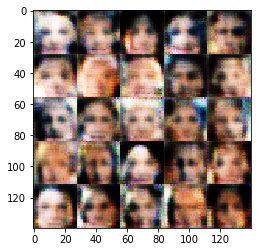

batch No.:  520
Epoch 1/1... Discriminator Loss: 0.4153... Generator Loss: 3.0287
batch No.:  540
Epoch 1/1... Discriminator Loss: 0.7477... Generator Loss: 1.5112
batch No.:  560
Epoch 1/1... Discriminator Loss: 0.4724... Generator Loss: 2.0077
batch No.:  580
Epoch 1/1... Discriminator Loss: 0.3840... Generator Loss: 3.9119
batch No.:  600
Epoch 1/1... Discriminator Loss: 0.4696... Generator Loss: 3.3067


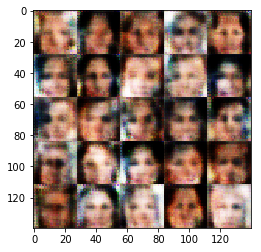

batch No.:  620
Epoch 1/1... Discriminator Loss: 0.4029... Generator Loss: 2.4492
batch No.:  640
Epoch 1/1... Discriminator Loss: 0.2555... Generator Loss: 3.3436
batch No.:  660
Epoch 1/1... Discriminator Loss: 0.9409... Generator Loss: 2.6092
batch No.:  680
Epoch 1/1... Discriminator Loss: 0.8596... Generator Loss: 3.0217
batch No.:  700
Epoch 1/1... Discriminator Loss: 0.6161... Generator Loss: 1.6870


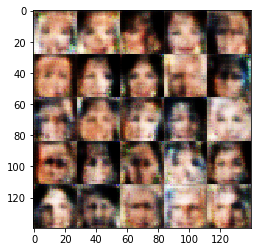

batch No.:  720
Epoch 1/1... Discriminator Loss: 0.9129... Generator Loss: 1.3163
batch No.:  740
Epoch 1/1... Discriminator Loss: 0.5874... Generator Loss: 3.0176
batch No.:  760
Epoch 1/1... Discriminator Loss: 0.9178... Generator Loss: 1.4844
batch No.:  780
Epoch 1/1... Discriminator Loss: 0.5608... Generator Loss: 2.6482
batch No.:  800
Epoch 1/1... Discriminator Loss: 0.4847... Generator Loss: 2.3271


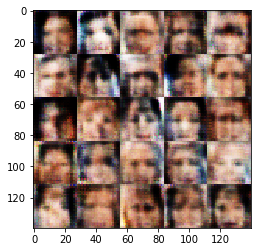

batch No.:  820
Epoch 1/1... Discriminator Loss: 0.7057... Generator Loss: 1.1162
batch No.:  840
Epoch 1/1... Discriminator Loss: 1.3090... Generator Loss: 1.1501
batch No.:  860
Epoch 1/1... Discriminator Loss: 0.8215... Generator Loss: 2.3693
batch No.:  880
Epoch 1/1... Discriminator Loss: 0.6234... Generator Loss: 2.6037
batch No.:  900
Epoch 1/1... Discriminator Loss: 0.5566... Generator Loss: 2.2826


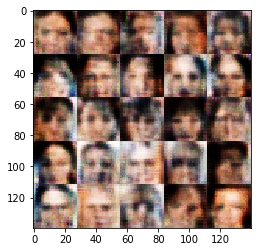

batch No.:  920
Epoch 1/1... Discriminator Loss: 0.4972... Generator Loss: 1.8753
batch No.:  940
Epoch 1/1... Discriminator Loss: 0.7603... Generator Loss: 3.5345
batch No.:  960
Epoch 1/1... Discriminator Loss: 0.5619... Generator Loss: 2.8972
batch No.:  980
Epoch 1/1... Discriminator Loss: 0.5906... Generator Loss: 1.8090
batch No.:  1000
Epoch 1/1... Discriminator Loss: 0.4736... Generator Loss: 2.4812


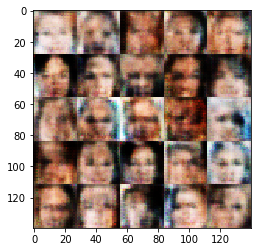

batch No.:  1020
Epoch 1/1... Discriminator Loss: 0.6935... Generator Loss: 2.3320
batch No.:  1040
Epoch 1/1... Discriminator Loss: 0.7810... Generator Loss: 2.0603
batch No.:  1060
Epoch 1/1... Discriminator Loss: 0.9397... Generator Loss: 2.5764
batch No.:  1080
Epoch 1/1... Discriminator Loss: 0.7098... Generator Loss: 1.6777
batch No.:  1100
Epoch 1/1... Discriminator Loss: 0.4818... Generator Loss: 2.6747


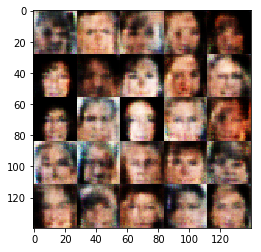

batch No.:  1120
Epoch 1/1... Discriminator Loss: 0.5686... Generator Loss: 2.2394
batch No.:  1140
Epoch 1/1... Discriminator Loss: 0.9019... Generator Loss: 1.6251
batch No.:  1160
Epoch 1/1... Discriminator Loss: 0.7687... Generator Loss: 1.1490
batch No.:  1180
Epoch 1/1... Discriminator Loss: 0.9192... Generator Loss: 1.9573
batch No.:  1200
Epoch 1/1... Discriminator Loss: 0.4631... Generator Loss: 1.9839


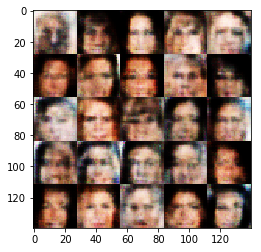

batch No.:  1220
Epoch 1/1... Discriminator Loss: 0.5444... Generator Loss: 2.5641
batch No.:  1240
Epoch 1/1... Discriminator Loss: 0.5932... Generator Loss: 1.7804
batch No.:  1260
Epoch 1/1... Discriminator Loss: 0.9419... Generator Loss: 1.2554
batch No.:  1280
Epoch 1/1... Discriminator Loss: 0.8529... Generator Loss: 3.2565
batch No.:  1300
Epoch 1/1... Discriminator Loss: 0.6315... Generator Loss: 1.4799


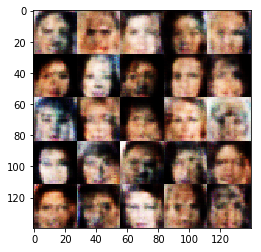

batch No.:  1320
Epoch 1/1... Discriminator Loss: 0.6841... Generator Loss: 1.7030
batch No.:  1340
Epoch 1/1... Discriminator Loss: 0.5156... Generator Loss: 3.1243
batch No.:  1360
Epoch 1/1... Discriminator Loss: 0.6322... Generator Loss: 3.1567
batch No.:  1380
Epoch 1/1... Discriminator Loss: 0.7900... Generator Loss: 1.5046
batch No.:  1400
Epoch 1/1... Discriminator Loss: 0.4851... Generator Loss: 3.0495


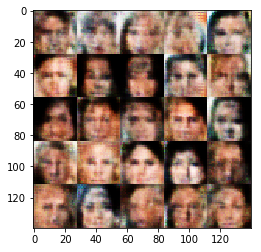

batch No.:  1420
Epoch 1/1... Discriminator Loss: 0.6276... Generator Loss: 2.1085
batch No.:  1440
Epoch 1/1... Discriminator Loss: 0.9888... Generator Loss: 2.2556
batch No.:  1460
Epoch 1/1... Discriminator Loss: 0.5632... Generator Loss: 3.2844
batch No.:  1480
Epoch 1/1... Discriminator Loss: 0.3245... Generator Loss: 3.1423
batch No.:  1500
Epoch 1/1... Discriminator Loss: 0.8967... Generator Loss: 1.6803


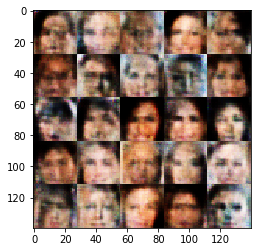

batch No.:  1520
Epoch 1/1... Discriminator Loss: 0.7993... Generator Loss: 1.7348
batch No.:  1540
Epoch 1/1... Discriminator Loss: 0.3885... Generator Loss: 3.3766
batch No.:  1560
Epoch 1/1... Discriminator Loss: 0.4444... Generator Loss: 2.5340
batch No.:  1580
Epoch 1/1... Discriminator Loss: 0.4939... Generator Loss: 2.0951
batch No.:  1600
Epoch 1/1... Discriminator Loss: 1.1543... Generator Loss: 1.8382


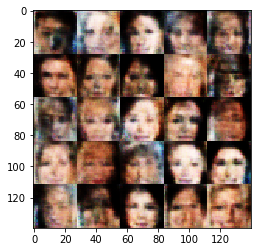

batch No.:  1620
Epoch 1/1... Discriminator Loss: 0.5527... Generator Loss: 2.6364
batch No.:  1640
Epoch 1/1... Discriminator Loss: 0.8026... Generator Loss: 3.4573
batch No.:  1660
Epoch 1/1... Discriminator Loss: 0.9547... Generator Loss: 3.2117
batch No.:  1680
Epoch 1/1... Discriminator Loss: 0.7692... Generator Loss: 1.3408
batch No.:  1700
Epoch 1/1... Discriminator Loss: 0.6877... Generator Loss: 1.8022


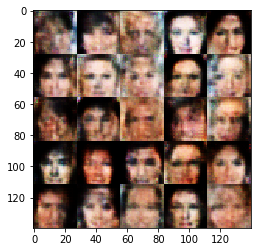

batch No.:  1720
Epoch 1/1... Discriminator Loss: 0.7124... Generator Loss: 2.8832
batch No.:  1740
Epoch 1/1... Discriminator Loss: 0.7167... Generator Loss: 2.0215
batch No.:  1760
Epoch 1/1... Discriminator Loss: 0.9301... Generator Loss: 0.7690
batch No.:  1780
Epoch 1/1... Discriminator Loss: 0.8730... Generator Loss: 1.2661
batch No.:  1800
Epoch 1/1... Discriminator Loss: 0.7110... Generator Loss: 2.4012


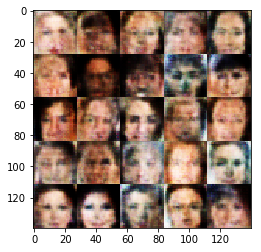

batch No.:  1820
Epoch 1/1... Discriminator Loss: 0.6681... Generator Loss: 1.4759
batch No.:  1840
Epoch 1/1... Discriminator Loss: 0.8723... Generator Loss: 1.3472
batch No.:  1860
Epoch 1/1... Discriminator Loss: 0.7113... Generator Loss: 2.4307
batch No.:  1880
Epoch 1/1... Discriminator Loss: 0.8718... Generator Loss: 0.9344
batch No.:  1900
Epoch 1/1... Discriminator Loss: 0.9785... Generator Loss: 1.1258


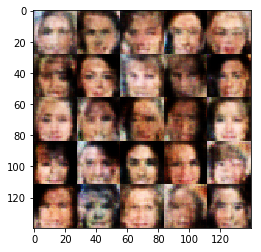

batch No.:  1920
Epoch 1/1... Discriminator Loss: 1.1106... Generator Loss: 2.7505
batch No.:  1940
Epoch 1/1... Discriminator Loss: 0.7920... Generator Loss: 1.4412
batch No.:  1960
Epoch 1/1... Discriminator Loss: 0.5669... Generator Loss: 1.7452
batch No.:  1980
Epoch 1/1... Discriminator Loss: 0.8297... Generator Loss: 1.0174
batch No.:  2000
Epoch 1/1... Discriminator Loss: 1.5455... Generator Loss: 1.9002


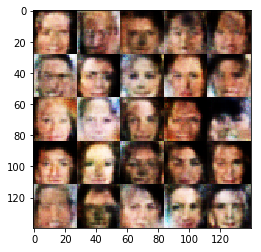

batch No.:  2020
Epoch 1/1... Discriminator Loss: 0.7989... Generator Loss: 1.1249
batch No.:  2040
Epoch 1/1... Discriminator Loss: 0.2545... Generator Loss: 3.7000
batch No.:  2060
Epoch 1/1... Discriminator Loss: 0.6000... Generator Loss: 1.6938
batch No.:  2080
Epoch 1/1... Discriminator Loss: 0.6345... Generator Loss: 1.3771
batch No.:  2100
Epoch 1/1... Discriminator Loss: 0.7987... Generator Loss: 1.3171


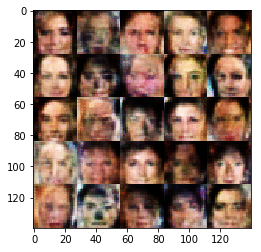

batch No.:  2120
Epoch 1/1... Discriminator Loss: 0.8705... Generator Loss: 1.4930
batch No.:  2140
Epoch 1/1... Discriminator Loss: 0.6061... Generator Loss: 2.2308
batch No.:  2160
Epoch 1/1... Discriminator Loss: 0.7849... Generator Loss: 1.2434
batch No.:  2180
Epoch 1/1... Discriminator Loss: 0.9320... Generator Loss: 1.3551
batch No.:  2200
Epoch 1/1... Discriminator Loss: 0.3427... Generator Loss: 3.1967


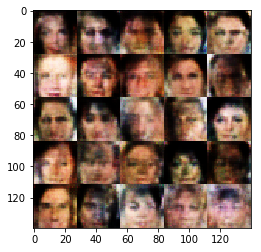

batch No.:  2220
Epoch 1/1... Discriminator Loss: 0.6899... Generator Loss: 1.1263
batch No.:  2240
Epoch 1/1... Discriminator Loss: 0.7057... Generator Loss: 1.4822
batch No.:  2260
Epoch 1/1... Discriminator Loss: 0.3204... Generator Loss: 3.1133
batch No.:  2280
Epoch 1/1... Discriminator Loss: 0.6778... Generator Loss: 1.8859
batch No.:  2300
Epoch 1/1... Discriminator Loss: 0.8983... Generator Loss: 1.1184


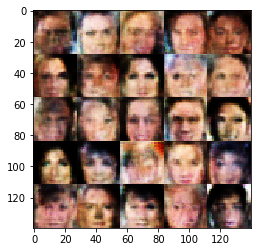

batch No.:  2320
Epoch 1/1... Discriminator Loss: 0.8683... Generator Loss: 1.3196
batch No.:  2340
Epoch 1/1... Discriminator Loss: 0.8864... Generator Loss: 1.3989
batch No.:  2360
Epoch 1/1... Discriminator Loss: 0.6919... Generator Loss: 1.5429
batch No.:  2380
Epoch 1/1... Discriminator Loss: 0.4411... Generator Loss: 2.1257
batch No.:  2400
Epoch 1/1... Discriminator Loss: 0.7556... Generator Loss: 3.0003


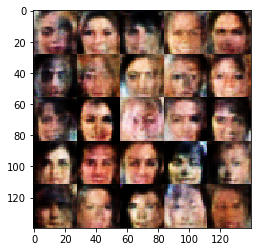

batch No.:  2420
Epoch 1/1... Discriminator Loss: 0.6852... Generator Loss: 2.1113
batch No.:  2440
Epoch 1/1... Discriminator Loss: 1.0494... Generator Loss: 0.8377
batch No.:  2460
Epoch 1/1... Discriminator Loss: 0.4102... Generator Loss: 3.8799
batch No.:  2480
Epoch 1/1... Discriminator Loss: 0.4618... Generator Loss: 2.3559
batch No.:  2500
Epoch 1/1... Discriminator Loss: 1.6405... Generator Loss: 2.3463


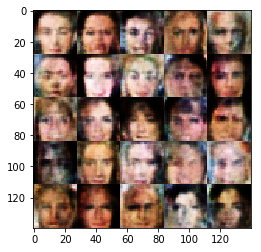

batch No.:  2520
Epoch 1/1... Discriminator Loss: 0.5981... Generator Loss: 2.3099
batch No.:  2540
Epoch 1/1... Discriminator Loss: 0.6061... Generator Loss: 2.4293
batch No.:  2560
Epoch 1/1... Discriminator Loss: 0.8349... Generator Loss: 1.5398
batch No.:  2580
Epoch 1/1... Discriminator Loss: 0.9819... Generator Loss: 1.1248
batch No.:  2600
Epoch 1/1... Discriminator Loss: 1.0382... Generator Loss: 0.8373


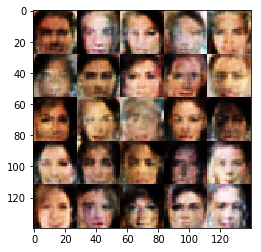

batch No.:  2620
Epoch 1/1... Discriminator Loss: 0.8120... Generator Loss: 1.1268
batch No.:  2640
Epoch 1/1... Discriminator Loss: 0.5031... Generator Loss: 3.2174
batch No.:  2660
Epoch 1/1... Discriminator Loss: 0.9699... Generator Loss: 1.2030
batch No.:  2680
Epoch 1/1... Discriminator Loss: 0.4708... Generator Loss: 2.2100
batch No.:  2700
Epoch 1/1... Discriminator Loss: 0.6389... Generator Loss: 1.3575


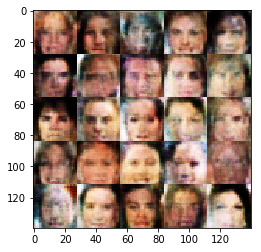

batch No.:  2720
Epoch 1/1... Discriminator Loss: 0.6000... Generator Loss: 2.0981
batch No.:  2740
Epoch 1/1... Discriminator Loss: 0.8313... Generator Loss: 1.1396
batch No.:  2760
Epoch 1/1... Discriminator Loss: 0.4844... Generator Loss: 2.6584
batch No.:  2780
Epoch 1/1... Discriminator Loss: 0.4998... Generator Loss: 3.1926
batch No.:  2800
Epoch 1/1... Discriminator Loss: 4.5793... Generator Loss: 2.4114


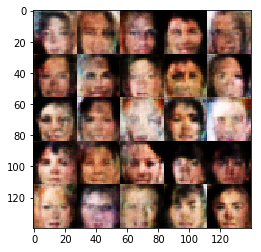

batch No.:  2820
Epoch 1/1... Discriminator Loss: 0.9721... Generator Loss: 0.9911
batch No.:  2840
Epoch 1/1... Discriminator Loss: 0.8285... Generator Loss: 1.2557
batch No.:  2860
Epoch 1/1... Discriminator Loss: 0.7685... Generator Loss: 1.5773
batch No.:  2880
Epoch 1/1... Discriminator Loss: 0.8490... Generator Loss: 1.9670
batch No.:  2900
Epoch 1/1... Discriminator Loss: 1.0469... Generator Loss: 0.9601


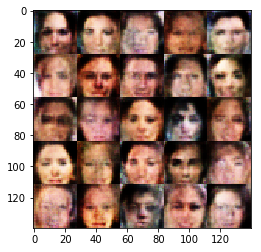

batch No.:  2920
Epoch 1/1... Discriminator Loss: 0.6577... Generator Loss: 1.7588
batch No.:  2940
Epoch 1/1... Discriminator Loss: 0.4991... Generator Loss: 2.0777
batch No.:  2960
Epoch 1/1... Discriminator Loss: 0.8644... Generator Loss: 1.3420
batch No.:  2980
Epoch 1/1... Discriminator Loss: 0.4916... Generator Loss: 1.9055
batch No.:  3000
Epoch 1/1... Discriminator Loss: 0.3731... Generator Loss: 2.9172


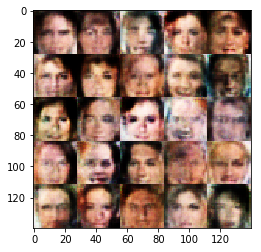

batch No.:  3020
Epoch 1/1... Discriminator Loss: 0.3990... Generator Loss: 2.4457
batch No.:  3040
Epoch 1/1... Discriminator Loss: 1.0418... Generator Loss: 1.1802
batch No.:  3060
Epoch 1/1... Discriminator Loss: 0.8376... Generator Loss: 1.2702
batch No.:  3080
Epoch 1/1... Discriminator Loss: 0.7210... Generator Loss: 1.5303
batch No.:  3100
Epoch 1/1... Discriminator Loss: 0.7277... Generator Loss: 1.8812


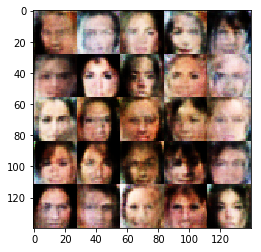

batch No.:  3120
Epoch 1/1... Discriminator Loss: 0.7680... Generator Loss: 2.3293
batch No.:  3140
Epoch 1/1... Discriminator Loss: 1.1233... Generator Loss: 1.0900
batch No.:  3160
Epoch 1/1... Discriminator Loss: 0.3781... Generator Loss: 3.2564
batch No.:  3180
Epoch 1/1... Discriminator Loss: 0.6728... Generator Loss: 1.7991
batch No.:  3200
Epoch 1/1... Discriminator Loss: 0.7664... Generator Loss: 1.4652


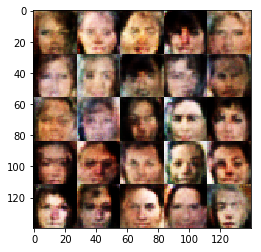

batch No.:  3220
Epoch 1/1... Discriminator Loss: 0.8128... Generator Loss: 1.0738
batch No.:  3240
Epoch 1/1... Discriminator Loss: 0.7796... Generator Loss: 3.4102
batch No.:  3260
Epoch 1/1... Discriminator Loss: 0.9963... Generator Loss: 1.1140
batch No.:  3280
Epoch 1/1... Discriminator Loss: 0.6531... Generator Loss: 1.5642
batch No.:  3300
Epoch 1/1... Discriminator Loss: 0.5281... Generator Loss: 2.0699


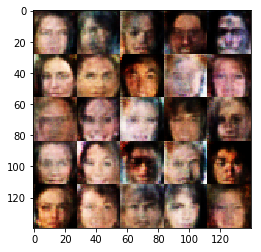

batch No.:  3320
Epoch 1/1... Discriminator Loss: 0.8008... Generator Loss: 1.5570
batch No.:  3340
Epoch 1/1... Discriminator Loss: 0.7925... Generator Loss: 1.5868
batch No.:  3360
Epoch 1/1... Discriminator Loss: 0.7913... Generator Loss: 1.5952
batch No.:  3380
Epoch 1/1... Discriminator Loss: 1.0788... Generator Loss: 1.1151
batch No.:  3400
Epoch 1/1... Discriminator Loss: 0.7852... Generator Loss: 1.4761


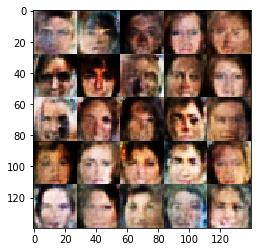

batch No.:  3420
Epoch 1/1... Discriminator Loss: 0.4554... Generator Loss: 3.2066
batch No.:  3440
Epoch 1/1... Discriminator Loss: 0.6602... Generator Loss: 2.0339
batch No.:  3460
Epoch 1/1... Discriminator Loss: 0.6819... Generator Loss: 1.7962
batch No.:  3480
Epoch 1/1... Discriminator Loss: 0.8685... Generator Loss: 1.5842
batch No.:  3500
Epoch 1/1... Discriminator Loss: 0.2426... Generator Loss: 4.0890


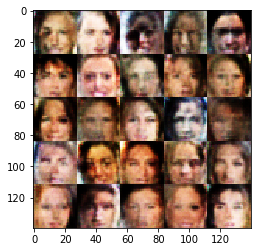

batch No.:  3520
Epoch 1/1... Discriminator Loss: 0.9684... Generator Loss: 1.8079
batch No.:  3540
Epoch 1/1... Discriminator Loss: 0.7123... Generator Loss: 1.7199
batch No.:  3560
Epoch 1/1... Discriminator Loss: 0.6821... Generator Loss: 1.4505
batch No.:  3580
Epoch 1/1... Discriminator Loss: 0.5660... Generator Loss: 2.2106
batch No.:  3600
Epoch 1/1... Discriminator Loss: 0.4061... Generator Loss: 2.5887


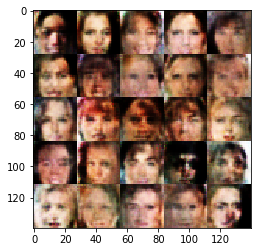

batch No.:  3620
Epoch 1/1... Discriminator Loss: 0.5687... Generator Loss: 3.0947
batch No.:  3640
Epoch 1/1... Discriminator Loss: 0.7356... Generator Loss: 3.1716
batch No.:  3660
Epoch 1/1... Discriminator Loss: 0.4213... Generator Loss: 3.0510
batch No.:  3680
Epoch 1/1... Discriminator Loss: 0.8776... Generator Loss: 1.4029
batch No.:  3700
Epoch 1/1... Discriminator Loss: 0.6073... Generator Loss: 2.4211


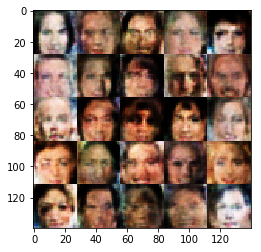

batch No.:  3720
Epoch 1/1... Discriminator Loss: 0.6609... Generator Loss: 2.9300
batch No.:  3740
Epoch 1/1... Discriminator Loss: 0.4391... Generator Loss: 2.6111
batch No.:  3760
Epoch 1/1... Discriminator Loss: 0.9408... Generator Loss: 3.7786
batch No.:  3780
Epoch 1/1... Discriminator Loss: 2.2130... Generator Loss: 0.6919
batch No.:  3800
Epoch 1/1... Discriminator Loss: 0.6199... Generator Loss: 2.0117


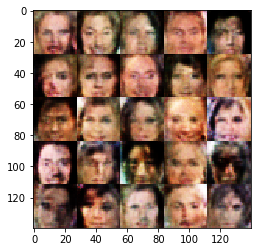

batch No.:  3820
Epoch 1/1... Discriminator Loss: 0.7906... Generator Loss: 1.4054
batch No.:  3840
Epoch 1/1... Discriminator Loss: 0.7856... Generator Loss: 2.1014
batch No.:  3860
Epoch 1/1... Discriminator Loss: 0.8998... Generator Loss: 3.9177
batch No.:  3880
Epoch 1/1... Discriminator Loss: 0.9444... Generator Loss: 1.2606
batch No.:  3900
Epoch 1/1... Discriminator Loss: 0.8752... Generator Loss: 2.3077


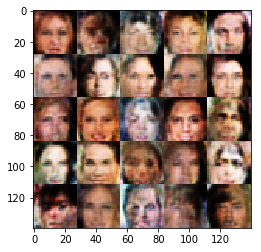

batch No.:  3920
Epoch 1/1... Discriminator Loss: 0.8825... Generator Loss: 1.0339
batch No.:  3940
Epoch 1/1... Discriminator Loss: 0.7831... Generator Loss: 1.6139
batch No.:  3960
Epoch 1/1... Discriminator Loss: 0.6297... Generator Loss: 2.1597
batch No.:  3980
Epoch 1/1... Discriminator Loss: 0.4009... Generator Loss: 2.4127
batch No.:  4000
Epoch 1/1... Discriminator Loss: 4.4098... Generator Loss: 4.4970


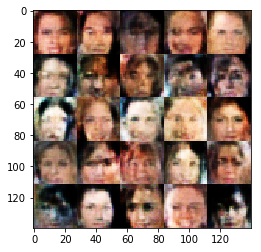

batch No.:  4020
Epoch 1/1... Discriminator Loss: 0.8476... Generator Loss: 1.9244
batch No.:  4040
Epoch 1/1... Discriminator Loss: 0.8562... Generator Loss: 1.2686
batch No.:  4060
Epoch 1/1... Discriminator Loss: 0.9343... Generator Loss: 2.4397
batch No.:  4080
Epoch 1/1... Discriminator Loss: 0.4465... Generator Loss: 2.8871
batch No.:  4100
Epoch 1/1... Discriminator Loss: 0.9364... Generator Loss: 1.6721


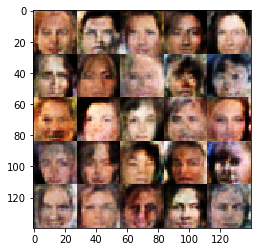

batch No.:  4120
Epoch 1/1... Discriminator Loss: 0.6889... Generator Loss: 1.4381
batch No.:  4140
Epoch 1/1... Discriminator Loss: 0.9088... Generator Loss: 2.0232
batch No.:  4160
Epoch 1/1... Discriminator Loss: 1.1005... Generator Loss: 0.8126
batch No.:  4180
Epoch 1/1... Discriminator Loss: 3.0137... Generator Loss: 0.0657
batch No.:  4200
Epoch 1/1... Discriminator Loss: 0.8472... Generator Loss: 1.3760


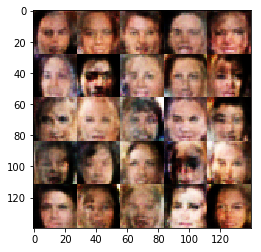

batch No.:  4220
Epoch 1/1... Discriminator Loss: 0.7475... Generator Loss: 1.7436
batch No.:  4240
Epoch 1/1... Discriminator Loss: 0.6534... Generator Loss: 2.5421
batch No.:  4260
Epoch 1/1... Discriminator Loss: 2.7307... Generator Loss: 0.1956
batch No.:  4280
Epoch 1/1... Discriminator Loss: 0.7426... Generator Loss: 1.5158
batch No.:  4300
Epoch 1/1... Discriminator Loss: 0.8812... Generator Loss: 1.3337


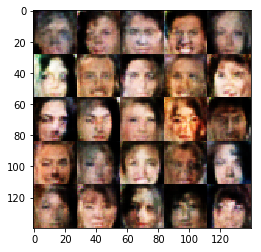

batch No.:  4320
Epoch 1/1... Discriminator Loss: 0.6447... Generator Loss: 1.4986
batch No.:  4340
Epoch 1/1... Discriminator Loss: 0.9278... Generator Loss: 1.0772
batch No.:  4360
Epoch 1/1... Discriminator Loss: 0.5564... Generator Loss: 2.0951
batch No.:  4380
Epoch 1/1... Discriminator Loss: 1.9263... Generator Loss: 0.3454
batch No.:  4400
Epoch 1/1... Discriminator Loss: 0.9718... Generator Loss: 1.1850


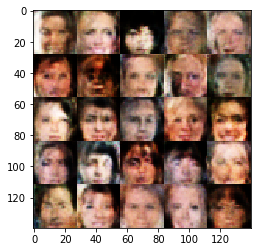

batch No.:  4420
Epoch 1/1... Discriminator Loss: 0.9264... Generator Loss: 0.9937
batch No.:  4440
Epoch 1/1... Discriminator Loss: 0.6659... Generator Loss: 1.9290
batch No.:  4460
Epoch 1/1... Discriminator Loss: 0.4856... Generator Loss: 2.8313
batch No.:  4480
Epoch 1/1... Discriminator Loss: 0.8897... Generator Loss: 1.7487
batch No.:  4500
Epoch 1/1... Discriminator Loss: 0.8556... Generator Loss: 1.9933


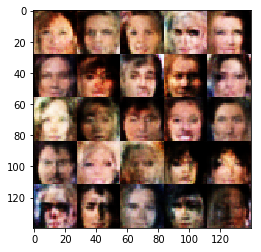

batch No.:  4520
Epoch 1/1... Discriminator Loss: 0.8633... Generator Loss: 1.4760
batch No.:  4540
Epoch 1/1... Discriminator Loss: 0.8220... Generator Loss: 2.5427
batch No.:  4560
Epoch 1/1... Discriminator Loss: 0.4637... Generator Loss: 2.5478
batch No.:  4580
Epoch 1/1... Discriminator Loss: 0.8191... Generator Loss: 1.4488
batch No.:  4600
Epoch 1/1... Discriminator Loss: 0.5766... Generator Loss: 1.7721


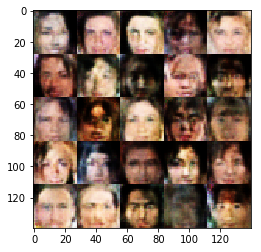

batch No.:  4620
Epoch 1/1... Discriminator Loss: 0.3976... Generator Loss: 3.0353
batch No.:  4640
Epoch 1/1... Discriminator Loss: 0.7984... Generator Loss: 1.9788
batch No.:  4660
Epoch 1/1... Discriminator Loss: 1.1371... Generator Loss: 0.8557
batch No.:  4680
Epoch 1/1... Discriminator Loss: 1.0245... Generator Loss: 0.9793
batch No.:  4700
Epoch 1/1... Discriminator Loss: 0.7906... Generator Loss: 1.3278


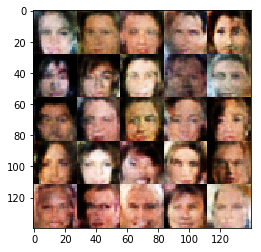

batch No.:  4720
Epoch 1/1... Discriminator Loss: 0.8258... Generator Loss: 1.4808
batch No.:  4740
Epoch 1/1... Discriminator Loss: 0.7426... Generator Loss: 1.3940
batch No.:  4760
Epoch 1/1... Discriminator Loss: 0.8237... Generator Loss: 1.5224
batch No.:  4780
Epoch 1/1... Discriminator Loss: 0.7431... Generator Loss: 1.5277
batch No.:  4800
Epoch 1/1... Discriminator Loss: 0.3877... Generator Loss: 2.6258


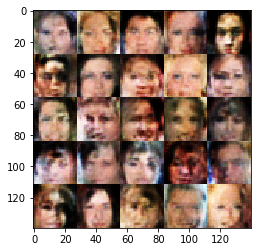

batch No.:  4820
Epoch 1/1... Discriminator Loss: 0.7778... Generator Loss: 1.5657
batch No.:  4840
Epoch 1/1... Discriminator Loss: 0.7469... Generator Loss: 1.8235
batch No.:  4860
Epoch 1/1... Discriminator Loss: 1.2766... Generator Loss: 0.7238
batch No.:  4880
Epoch 1/1... Discriminator Loss: 0.7839... Generator Loss: 1.5403
batch No.:  4900
Epoch 1/1... Discriminator Loss: 0.7011... Generator Loss: 1.6461


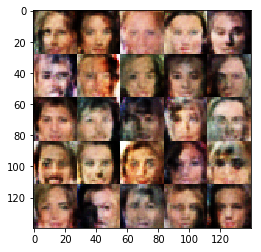

batch No.:  4920
Epoch 1/1... Discriminator Loss: 0.9651... Generator Loss: 1.2186
batch No.:  4940
Epoch 1/1... Discriminator Loss: 0.6599... Generator Loss: 1.7628
batch No.:  4960
Epoch 1/1... Discriminator Loss: 0.6495... Generator Loss: 1.9350
batch No.:  4980
Epoch 1/1... Discriminator Loss: 0.7373... Generator Loss: 2.3140
batch No.:  5000
Epoch 1/1... Discriminator Loss: 0.7249... Generator Loss: 2.3588


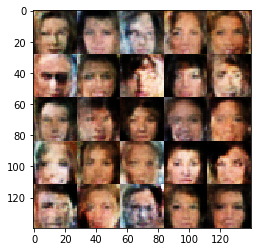

batch No.:  5020
Epoch 1/1... Discriminator Loss: 1.2484... Generator Loss: 0.9629
batch No.:  5040
Epoch 1/1... Discriminator Loss: 0.8184... Generator Loss: 1.6705
batch No.:  5060
Epoch 1/1... Discriminator Loss: 0.8861... Generator Loss: 1.2495
batch No.:  5080
Epoch 1/1... Discriminator Loss: 1.2487... Generator Loss: 0.6744
batch No.:  5100
Epoch 1/1... Discriminator Loss: 0.9629... Generator Loss: 1.2383


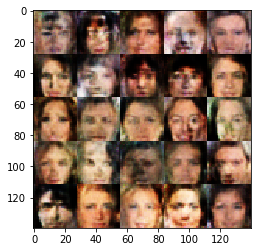

batch No.:  5120
Epoch 1/1... Discriminator Loss: 0.3812... Generator Loss: 2.6042
batch No.:  5140
Epoch 1/1... Discriminator Loss: 1.2843... Generator Loss: 0.9702
batch No.:  5160
Epoch 1/1... Discriminator Loss: 0.9846... Generator Loss: 0.9600
batch No.:  5180
Epoch 1/1... Discriminator Loss: 0.8306... Generator Loss: 1.1568
batch No.:  5200
Epoch 1/1... Discriminator Loss: 0.7613... Generator Loss: 1.3626


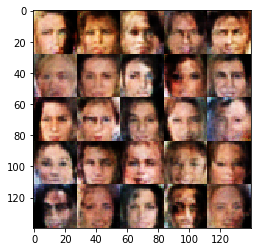

batch No.:  5220
Epoch 1/1... Discriminator Loss: 1.2655... Generator Loss: 1.9441
batch No.:  5240
Epoch 1/1... Discriminator Loss: 0.7051... Generator Loss: 1.5206
batch No.:  5260
Epoch 1/1... Discriminator Loss: 1.2564... Generator Loss: 1.5650
batch No.:  5280
Epoch 1/1... Discriminator Loss: 0.6612... Generator Loss: 1.6739
batch No.:  5300
Epoch 1/1... Discriminator Loss: 1.1006... Generator Loss: 1.7896


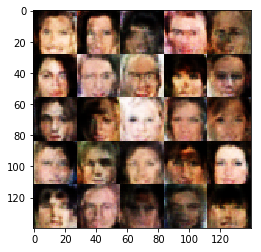

batch No.:  5320
Epoch 1/1... Discriminator Loss: 0.8096... Generator Loss: 1.6594
batch No.:  5340
Epoch 1/1... Discriminator Loss: 0.8662... Generator Loss: 1.5560
batch No.:  5360
Epoch 1/1... Discriminator Loss: 0.8585... Generator Loss: 1.2381
batch No.:  5380
Epoch 1/1... Discriminator Loss: 0.7289... Generator Loss: 1.6428
batch No.:  5400
Epoch 1/1... Discriminator Loss: 0.8555... Generator Loss: 1.1700


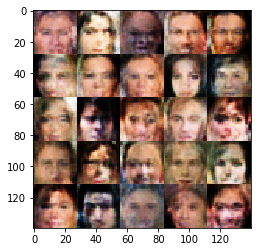

batch No.:  5420
Epoch 1/1... Discriminator Loss: 0.8217... Generator Loss: 1.7513
batch No.:  5440
Epoch 1/1... Discriminator Loss: 0.6596... Generator Loss: 2.8240
batch No.:  5460
Epoch 1/1... Discriminator Loss: 0.6593... Generator Loss: 1.6941
batch No.:  5480
Epoch 1/1... Discriminator Loss: 1.2026... Generator Loss: 0.9998
batch No.:  5500
Epoch 1/1... Discriminator Loss: 0.7856... Generator Loss: 1.2570


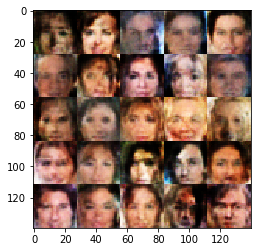

batch No.:  5520
Epoch 1/1... Discriminator Loss: 0.6921... Generator Loss: 1.8899
batch No.:  5540
Epoch 1/1... Discriminator Loss: 1.2971... Generator Loss: 0.9068
batch No.:  5560
Epoch 1/1... Discriminator Loss: 1.0266... Generator Loss: 1.0034
batch No.:  5580
Epoch 1/1... Discriminator Loss: 1.0858... Generator Loss: 1.1958
batch No.:  5600
Epoch 1/1... Discriminator Loss: 1.4979... Generator Loss: 0.4968


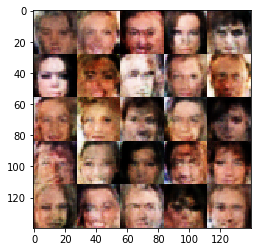

batch No.:  5620
Epoch 1/1... Discriminator Loss: 0.7752... Generator Loss: 1.3232
batch No.:  5640
Epoch 1/1... Discriminator Loss: 1.7334... Generator Loss: 1.3041
batch No.:  5660
Epoch 1/1... Discriminator Loss: 0.9256... Generator Loss: 1.2030
batch No.:  5680
Epoch 1/1... Discriminator Loss: 0.7479... Generator Loss: 1.5334
batch No.:  5700
Epoch 1/1... Discriminator Loss: 0.9406... Generator Loss: 3.0699


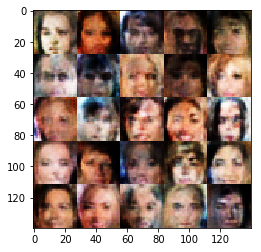

batch No.:  5720
Epoch 1/1... Discriminator Loss: 1.1510... Generator Loss: 0.8495
batch No.:  5740
Epoch 1/1... Discriminator Loss: 0.9225... Generator Loss: 1.3126
batch No.:  5760
Epoch 1/1... Discriminator Loss: 0.8268... Generator Loss: 0.9873
batch No.:  5780
Epoch 1/1... Discriminator Loss: 1.1186... Generator Loss: 1.2344
batch No.:  5800
Epoch 1/1... Discriminator Loss: 0.7709... Generator Loss: 1.3903


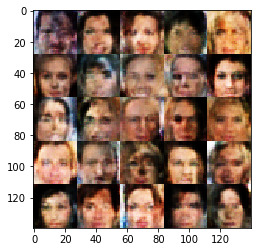

batch No.:  5820
Epoch 1/1... Discriminator Loss: 1.2644... Generator Loss: 1.4458
batch No.:  5840
Epoch 1/1... Discriminator Loss: 0.9109... Generator Loss: 2.1150
batch No.:  5860
Epoch 1/1... Discriminator Loss: 0.8240... Generator Loss: 1.1980
batch No.:  5880
Epoch 1/1... Discriminator Loss: 1.1444... Generator Loss: 1.2698
batch No.:  5900
Epoch 1/1... Discriminator Loss: 0.8910... Generator Loss: 1.1427


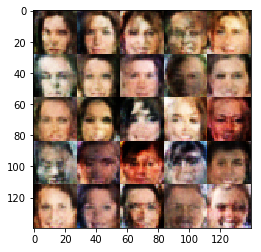

batch No.:  5920
Epoch 1/1... Discriminator Loss: 0.9724... Generator Loss: 1.0826
batch No.:  5940
Epoch 1/1... Discriminator Loss: 1.0394... Generator Loss: 2.4321
batch No.:  5960
Epoch 1/1... Discriminator Loss: 1.0360... Generator Loss: 0.9690
batch No.:  5980
Epoch 1/1... Discriminator Loss: 0.8934... Generator Loss: 1.0359
batch No.:  6000
Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 1.1819


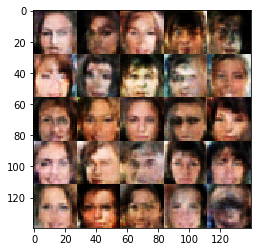

batch No.:  6020
Epoch 1/1... Discriminator Loss: 0.6633... Generator Loss: 1.8032
batch No.:  6040
Epoch 1/1... Discriminator Loss: 1.2446... Generator Loss: 0.7976
batch No.:  6060
Epoch 1/1... Discriminator Loss: 0.8936... Generator Loss: 1.1270
batch No.:  6080
Epoch 1/1... Discriminator Loss: 1.1013... Generator Loss: 0.9807
batch No.:  6100
Epoch 1/1... Discriminator Loss: 0.9480... Generator Loss: 0.9847


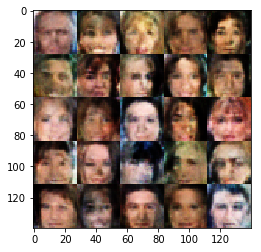

batch No.:  6120
Epoch 1/1... Discriminator Loss: 3.4029... Generator Loss: 2.6005
batch No.:  6140
Epoch 1/1... Discriminator Loss: 1.1354... Generator Loss: 0.8318
batch No.:  6160
Epoch 1/1... Discriminator Loss: 0.5264... Generator Loss: 3.6634
batch No.:  6180
Epoch 1/1... Discriminator Loss: 0.8510... Generator Loss: 1.8607
batch No.:  6200
Epoch 1/1... Discriminator Loss: 3.7782... Generator Loss: 3.2700


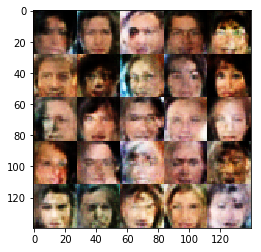

batch No.:  6220
Epoch 1/1... Discriminator Loss: 1.0120... Generator Loss: 0.9427
batch No.:  6240
Epoch 1/1... Discriminator Loss: 0.9065... Generator Loss: 1.2000
batch No.:  6260
Epoch 1/1... Discriminator Loss: 0.8354... Generator Loss: 1.0516
batch No.:  6280
Epoch 1/1... Discriminator Loss: 0.8013... Generator Loss: 1.3227
batch No.:  6300
Epoch 1/1... Discriminator Loss: 1.2516... Generator Loss: 1.0539


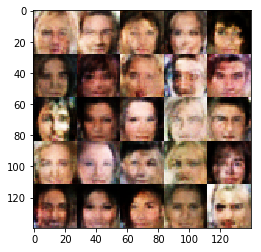

batch No.:  6320
Epoch 1/1... Discriminator Loss: 0.7773... Generator Loss: 1.4502


IndexError: list index out of range

In [31]:
batch_size = 32
z_dim = 100
learning_rate = 0.0002
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.